In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
traffic_df = pd.read_excel('../data/oppia-traffic-by-id-country.xlsx', sheet_name = 'id-country', skiprows = 14)
traffic_df = traffic_df.iloc[1:, 0:8] # Skip (not set) value in Country col
traffic_df.sample(3)


,ga:clientId,Country,Sessions,Bounces,Avg. Session Duration,Avg. Page Load Time (sec),Page Load Sample,Goal Completions
35518,1.45875e+09,India,1,0,7.000000,0.0,0,1
92309,2.66672e+08,Philippines,1,0,94.000000,0.0,0,2
134830,8.1448e+08,Netherlands,7,0,1323.142857,0.0,0,16


In [4]:
lang_edu_df = pd.read_csv('../data/lang_edu_df.csv')
lang_df = lang_edu_df.iloc[:, 8:]
lang_df.sample(3)

,country,income_group,econ_region,geo_region,cluster,English,Spanish,French,Portuguese,Chinese,Hindi,Arabic,english_popular
43,Guinea,Low income,Sub-Saharan Africa,Sub-Saharan Africa,Low,False,False,True,False,False,False,False,False
32,Algeria,Upper middle income,"Middle East, North Africa, and Pakistan",Middle East and North Africa,Low,False,False,True,False,False,False,True,False
22,Cameroon,Lower middle income,Sub-Saharan Africa,Sub-Saharan Africa,Low,True,False,True,False,False,False,False,False


# Fix country names mismatch

In [6]:
traffic_country = list(traffic_df.Country.unique())
lang_country = list(lang_df.country)

# Find what countries having names listed differently
mismatch = []
for country in lang_country:
    if country not in traffic_country:
        mismatch.append(country)
mismatch

['Bosnia and Herzegovina',
 'Brunei Darussalam',
 'Congo, Democratic Rep.',
 'Cape Verde',
 'Czech Republic',
 'Gambia, The',
 'Hong Kong SAR',
 'Iran, Islamic Rep.',
 'Kyrgyz Republic',
 'Korea, Rep.',
 'Lao PDR',
 'Russian Federation',
 'Swaziland',
 'Chad',
 'Trinidad and Tobago',
 'Taiwan, China',
 'Viet Nam']

In [7]:
change_country_name = {'Brunei Darussalam':'Brunei' , 
                        'Cabo Verde': 'Cape Verde', 
                         'Congo, Democratic Rep.': 'Congo - Kinshasa',
                       'Czech Republic': 'Czechia', 
                         'Hong Kong SAR':'Hong Kong', 
                         'Iran, Islamic Rep.':'Iran',
                        'Korea, Rep.':'South Korea', 
                         'Kyrgyz Republic':'Kyrgyzstan', 
                         'Lao PDR':'Laos', 
                         'Russian Federation':'Russia',
                        'Swaziland':'Eswatini', 
                         'Taiwan, China':'Taiwan', 
                         'Viet Nam': 'Vietnam',
                          'Gambia, The': 'Gambia',
                      'Bosnia and Herzegovina':'Bosnia & Herzegovina',
                      'Trinidad and Tobago': 'Trinidad & Tobago'} 

# Change country names 
lang_df.country.replace(change_country_name, inplace = True)

In [8]:
traffic_country = list(traffic_df.Country.unique())
lang_country = list(lang_df.country)

mismatch = []
for country in lang_country:
    if country not in traffic_country:
        mismatch.append(country)
print('There are 2 countries in the language/cluster data set but not in the Oppia traffic dataset. \
Maybe because we have no traffic from these 2 countries: {}'.format(mismatch))

There are 2 countries in the language/cluster data set but not in the Oppia traffic dataset. Maybe because we have no traffic from these 2 countries: ['Cape Verde', 'Chad']


In [9]:
# Find countries in the Opppia traffic dataset but not in language data
excluded_country = []
for country in traffic_country:
    if country not in lang_country:
        excluded_country.append(country)
print('There are {} countries excluded in the language/education dataset due to lack of data in CGI dataset. They are: {}'.\
      format(len(excluded_country), excluded_country))

There are 83 countries excluded in the language/education dataset due to lack of data in CGI dataset. They are: ['Iraq', 'St. Vincent & Grenadines', 'Slovakia', 'Belize', 'Côte d’Ivoire', '(not set)', 'Bahamas', 'Puerto Rico', 'St. Lucia', 'Antigua & Barbuda', 'Papua New Guinea', 'British Virgin Islands', 'North Macedonia', 'Myanmar (Burma)', 'Kosovo', 'Northern Mariana Islands', 'Macao', 'Belarus', 'Fiji', 'Syria', 'Turks & Caicos Islands', 'Somalia', 'Barbados', 'Samoa', 'American Samoa', 'Cuba', 'Palestine', 'Sudan', 'Uzbekistan', 'Guyana', 'Curaçao', 'Palau', 'Sint Maarten', 'Guam', 'Bolivia', 'Dominica', 'U.S. Virgin Islands', 'Maldives', 'Anguilla', 'Gabon', 'Grenada', 'Haiti', 'Jersey', 'Tonga', 'Togo', 'Guadeloupe', 'Turkmenistan', 'Congo - Brazzaville', 'Aruba', 'Martinique', 'Faroe Islands', 'Afghanistan', 'St. Kitts & Nevis', 'Western Sahara', 'Libya', 'Réunion', 'Guernsey', 'Marshall Islands', 'Burkina Faso', 'Cook Islands', 'Caribbean Netherlands', 'Cayman Islands', 'Gibra

# Calculate KPI

In [15]:
traffic_df['bounce_rate'] = traffic_df.Bounces/traffic_df.Sessions
traffic_df['goal_completion_rate'] = traffic_df.Bounces/traffic_df.Sessions

In [18]:
traffic_df

,ga:clientId,Country,Sessions,Bounces,Avg. Session Duration,Avg. Page Load Time (sec),Page Load Sample,Goal Completions,bounce_rate,goal_completion_rate
1,1.00002e+09,United States,9,1,724.555556,0.0,0,19,0.111111,2.111111
2,1.00002e+09,United Kingdom,3,0,807.333333,0.0,0,10,0.000000,3.333333
3,1.00003e+09,Pakistan,1,0,30.000000,0.0,0,1,0.000000,1.000000
4,1.00004e+09,United Kingdom,1,0,96.000000,0.0,0,3,0.000000,3.000000
5,1.00005e+09,India,2,0,51.500000,0.0,0,2,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
148940,9.99965e+08,United States,1,0,177.000000,0.0,0,3,0.000000,3.000000
148941,9.99966e+08,United States,3,0,33.333333,0.0,0,4,0.000000,1.333333
148942,9.99982e+07,United States,1,0,2.000000,0.0,0,1,0.000000,1.000000
148943,9.99991e+08,Dominica,36,0,1218.166667,0.0,0,70,0.000000,1.944444


In [25]:
traffic_df[traffic_df['goal_completion_rate'] >1]

,ga:clientId,Country,Sessions,Bounces,Avg. Session Duration,Avg. Page Load Time (sec),Page Load Sample,Goal Completions,bounce_rate,goal_completion_rate
1,1.00002e+09,United States,9,1,724.555556,0.0,0,19,0.111111,2.111111
2,1.00002e+09,United Kingdom,3,0,807.333333,0.0,0,10,0.000000,3.333333
4,1.00004e+09,United Kingdom,1,0,96.000000,0.0,0,3,0.000000,3.000000
8,1.00008e+09,Philippines,1,0,57.000000,0.0,0,2,0.000000,2.000000
10,1.0001e+09,United Kingdom,2,0,89.500000,0.0,0,4,0.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...
148934,9.9986e+08,Hong Kong,2,0,305.000000,0.0,0,4,0.000000,2.000000
148937,9.99935e+08,United States,1,0,80.000000,0.0,0,2,0.000000,2.000000
148940,9.99965e+08,United States,1,0,177.000000,0.0,0,3,0.000000,3.000000
148941,9.99966e+08,United States,3,0,33.333333,0.0,0,4,0.000000,1.333333


In [61]:
joined_df.groupby('cluster').describe()

Sessions                                                 Bounces  \
           count      mean       std  min  25%  50%  75%    max    count   
cluster                                                                    
High     85065.0  1.567942  2.607353  1.0  1.0  1.0  1.0  312.0  85065.0   
Low      29352.0  1.507734  2.979586  1.0  1.0  1.0  1.0  339.0  29352.0   
Mid      30821.0  1.497713  2.458197  1.0  1.0  1.0  1.0  222.0  30821.0   

                   ... bounce_rate      goal_completion_rate            \
             mean  ...         75%  max                count      mean   
cluster            ...                                                   
High     0.270852  ...         0.0  1.0              85065.0  1.339876   
Low      0.417110  ...         1.0  1.0              29352.0  1.133472   
Mid      0.412641  ...         1.0  1.0              30821.0  1.138155   

                                            
              std  min  25%  50%  75%  max  
cluster                                     
High     1.096238  0.0  1.0  1.0  2.0  5.0  
Low      1.097434  0.0  0.0  1.0  2.0  5.0  
Mid      1.105057  0.0  0.0  1.0  2.0  5.0  

[3 rows x 64 columns]

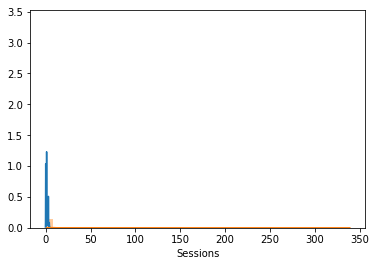

In [30]:
sns.distplot(traffic_df['goal_completion_rate'])


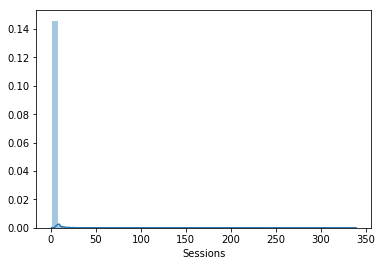

In [31]:
sns.distplot(traffic_df['Sessions'])

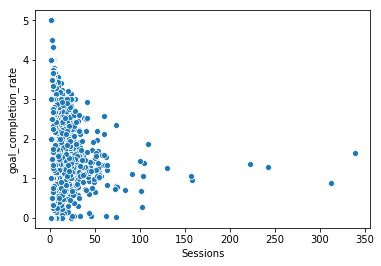

In [32]:
sns.scatterplot(traffic_df['Sessions'],traffic_df['goal_completion_rate'])

In [35]:
traffic_df[traffic_df['goal_completion_rate'] <1]

,ga:clientId,Country,Sessions,Bounces,Avg. Session Duration,Avg. Page Load Time (sec),Page Load Sample,Goal Completions,bounce_rate,goal_completion_rate
9,1.00009e+08,India,1,1,0.000000,0.0,0,0,1.000000,0.000000
12,1.00018e+09,Pakistan,1,1,0.000000,0.0,0,0,1.000000,0.000000
13,1.00019e+09,India,1,1,0.000000,0.0,0,0,1.000000,0.000000
17,1.00021e+09,India,1,1,0.000000,0.0,0,0,1.000000,0.000000
25,1.00027e+09,United Kingdom,1,0,5.000000,0.0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
148920,9.99663e+08,Netherlands,1,1,0.000000,0.0,0,0,1.000000,0.000000
148925,9.99731e+07,Ghana,1,1,0.000000,0.0,0,0,1.000000,0.000000
148935,9.9991e+08,Ireland,1,1,0.000000,0.0,0,0,1.000000,0.000000
148936,9.9993e+08,United States,1,1,0.000000,0.0,0,0,1.000000,0.000000


In [42]:
# Ids that have 1 session and 100% bounce rate are considered uninterested
uninterested_id = traffic_df[(traffic_df['bounce_rate'] == 1) & (traffic_df['Sessions'] == 1)].index

traffic_df['uninterested'] = False
traffic_df.loc[uninterested_id, 'uninterested'] = True

In [45]:
traffic_df.groupby('Country').mean()

,Sessions,Bounces,Avg. Session Duration,Avg. Page Load Time (sec),Page Load Sample,Goal Completions,bounce_rate,goal_completion_rate,uninterested
Country,,,,,,,,,
(not set),1.393204,0.378641,186.336877,0.089442,0.004854,1.825243,0.312298,1.163172,0.300971
Afghanistan,1.428571,0.600000,109.230952,9.106900,0.085714,1.600000,0.459524,1.023810,0.342857
Albania,5.018349,0.834862,208.697960,0.026174,0.009174,7.669725,0.209755,1.433682,0.165138
Algeria,1.440252,0.345912,215.532510,0.000000,0.000000,2.157233,0.258910,1.381566,0.220126
American Samoa,1.093750,0.375000,117.468750,0.000000,0.000000,1.187500,0.343750,1.031250,0.312500
...,...,...,...,...,...,...,...,...,...
Vietnam,1.276235,0.490741,115.411363,0.045647,0.023148,1.305556,0.428313,0.917896,0.393519
Western Sahara,1.333333,0.000000,279.500000,0.000000,0.000000,3.666667,0.000000,2.500000,0.000000
Yemen,1.515625,0.531250,167.333550,0.000000,0.000000,1.515625,0.441840,0.890191,0.375000


In [47]:
traffic_df.groupby('Country').describe()

Sessions                                                   \
                  count      mean        std  min  25%  50%   75%    max   
Country                                                                    
(not set)         206.0  1.393204   2.020807  1.0  1.0  1.0  1.00   25.0   
Afghanistan        35.0  1.428571   0.739066  1.0  1.0  1.0  2.00    4.0   
Albania           109.0  5.018349  21.908049  1.0  1.0  1.0  2.00  222.0   
Algeria           159.0  1.440252   1.046944  1.0  1.0  1.0  1.00    8.0   
American Samoa     32.0  1.093750   0.296145  1.0  1.0  1.0  1.00    2.0   
...                 ...       ...        ...  ...  ...  ...   ...    ...   
Vietnam           648.0  1.276235   0.902987  1.0  1.0  1.0  1.00    9.0   
Western Sahara      3.0  1.333333   0.577350  1.0  1.0  1.0  1.50    2.0   
Yemen              64.0  1.515625   1.391496  1.0  1.0  1.0  1.25    9.0   
Zambia            216.0  1.226852   0.740472  1.0  1.0  1.0  1.00    6.0   
Zimbabwe          162.0  1.320988   0.982166  1.0  1.0  1.0  1.00   10.0   

               Bounces            ... bounce_rate      goal_completion_rate  \
                 count      mean  ...         75%  max                count   
Country                           ...                                         
(not set)        206.0  0.378641  ...    1.000000  1.0                206.0   
Afghanistan       35.0  0.600000  ...    1.000000  1.0                 35.0   
Albania          109.0  0.834862  ...    0.222222  1.0                109.0   
Algeria          159.0  0.345912  ...    0.500000  1.0                159.0   
American Samoa    32.0  0.375000  ...    1.000000  1.0                 32.0   
...                ...       ...  ...         ...  ...                  ...   
Vietnam          648.0  0.490741  ...    1.000000  1.0                648.0   
Western Sahara     3.0  0.000000  ...    0.000000  0.0                  3.0   
Yemen             64.0  0.531250  ...    1.000000  1.0                 64.0   
Zambia           216.0  0.504630  ...    1.000000  1.0                216.0   
Zimbabwe         162.0  0.388889  ...    1.000000  1.0                162.0   

                                                                  
                    mean       std  min  25%  50%       75%  max  
Country                                                           
(not set)       1.163172  1.126823  0.0  0.0  1.0  2.000000  4.0  
Afghanistan     1.023810  1.122514  0.0  0.0  1.0  1.750000  3.0  
Albania         1.433682  1.033253  0.0  1.0  1.0  2.000000  4.0  
Algeria         1.381566  1.165568  0.0  0.0  1.0  2.000000  4.5  
American Samoa  1.031250  1.197696  0.0  0.0  1.0  2.000000  3.5  
...                  ...       ...  ...  ...  ...       ...  ...  
Vietnam         0.917896  1.107391  0.0  0.0  0.5  1.500000  4.0  
Western Sahara  2.500000  1.322876  1.0  2.0  3.0  3.250000  3.5  
Yemen           0.890191  1.029099  0.0  0.0  1.0  1.270833  3.5  
Zambia          0.816744  0.932967  0.0  0.0  1.0  1.000000  4.0  
Zimbabwe        1.016152  1.059491  0.0  0.0  1.0  2.000000  4.0  

[215 rows x 64 columns]

In [62]:
traffic_df.groupby('uninterested').describe()

Sessions                                                 \
                 count      mean       std  min  25%  50%  75%    max   
uninterested                                                            
False         114795.0  1.703175  3.022213  1.0  1.0  1.0  2.0  339.0   
True           34149.0  1.000000  0.000000  1.0  1.0  1.0  1.0    1.0   

               Bounces            ... bounce_rate      goal_completion_rate  \
                 count      mean  ...         75%  max                count   
uninterested                      ...                                         
False         114795.0  0.137079  ...         0.0  1.0             114795.0   
True           34149.0  1.000000  ...         1.0  1.0              34149.0   

                                                            
                  mean       std  min  25%  50%   75%  max  
uninterested                                                
False         1.622148  0.989147  0.0  1.0  1.0  2.25  5.0  
True          0.000088  0.009373  0.0  0.0  0.0  0.00  1.0  

[2 rows x 64 columns]

In [55]:
joined_df = traffic_df.merge(lang_df, how = 'left', left_on = 'Country', right_on = 'country')\
            .drop(['country'], axis = 1)
joined_df.sample(3)

,ga:clientId,Country,Sessions,Bounces,Avg. Session Duration,Avg. Page Load Time (sec),Page Load Sample,Goal Completions,bounce_rate,goal_completion_rate,...,geo_region,cluster,English,Spanish,French,Portuguese,Chinese,Hindi,Arabic,english_popular
128871,7.36676e+07,Ukraine,1,0,10.0,0.0,0,1,0.0,1.0,...,Eurasia,Mid,False,False,False,False,False,False,False,False
27233,1.35133e+09,Philippines,1,1,0.0,0.0,0,0,1.0,0.0,...,East Asia and Pacific,Mid,True,False,False,False,False,False,False,True
15182,1.19517e+09,United States,1,1,0.0,0.0,0,0,1.0,0.0,...,Europe and North America,High,True,True,False,False,True,False,False,True


In [56]:
joined_df

,ga:clientId,Country,Sessions,Bounces,Avg. Session Duration,Avg. Page Load Time (sec),Page Load Sample,Goal Completions,bounce_rate,goal_completion_rate,...,geo_region,cluster,English,Spanish,French,Portuguese,Chinese,Hindi,Arabic,english_popular
0,1.00002e+09,United States,9,1,724.555556,0.0,0,19,0.111111,2.111111,...,Europe and North America,High,True,True,False,False,True,False,False,True
1,1.00002e+09,United Kingdom,3,0,807.333333,0.0,0,10,0.000000,3.333333,...,Europe and North America,High,True,False,False,False,False,False,False,True
2,1.00003e+09,Pakistan,1,0,30.000000,0.0,0,1,0.000000,1.000000,...,South Asia,Low,True,False,False,False,False,False,False,True
3,1.00004e+09,United Kingdom,1,0,96.000000,0.0,0,3,0.000000,3.000000,...,Europe and North America,High,True,False,False,False,False,False,False,True
4,1.00005e+09,India,2,0,51.500000,0.0,0,2,0.000000,1.000000,...,South Asia,Low,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148939,9.99965e+08,United States,1,0,177.000000,0.0,0,3,0.000000,3.000000,...,Europe and North America,High,True,True,False,False,True,False,False,True
148940,9.99966e+08,United States,3,0,33.333333,0.0,0,4,0.000000,1.333333,...,Europe and North America,High,True,True,False,False,True,False,False,True
148941,9.99982e+07,United States,1,0,2.000000,0.0,0,1,0.000000,1.000000,...,Europe and North America,High,True,True,False,False,True,False,False,True
148942,9.99991e+08,Dominica,36,0,1218.166667,0.0,0,70,0.000000,1.944444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
joined_df.to_csv('traffic-id-lang-edu.csv', index = False)